Extracts images from pages of books. Input should be in image format.
The notebook was created in Google Colab.

In [ ]:
import cv2
import numpy as np
import skimage.morphology as sm
from skimage import feature
import skimage.segmentation as ss
import matplotlib.pyplot as plt
from glob import glob
from skimage.measure import label, regionprops
from skimage.filters import threshold_otsu
from skimage.color import label2rgb
import os
from google.colab import files

In [ ]:
filepath = glob('path/to/image')

In [ ]:
def std_im(im):
    low = np.min(im)
    high = np.max(im)
    return (im - low) / (high - low)

In [ ]:
def extract_images(path=None, tr_border=None, img=None, r=250, s=5, t=0.98):
    """ Extracts unconnected objects from image """
    if path:
        image = cv2.imread(path)[:,:,::-1]
    else:
        image = img[:,:,::-1]
    image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # image_gray = np.where(image_gray==image_gray[0,0], 255, image_gray)
    # plt.imshow(image_gray, 'gray')
    image_gray = std_im(image_gray)
    extracted_images = []

    selem = sm.disk(s)
    im = sm.dilation(image_gray, selem)

    if tr_border:
        im = np.where(im==im[0,0], 0, 1)
        im = sm.erosion(im, selem)
    else:
        im = np.where(im > t, 0, 1)

    label_image = label(im)
    for region in regionprops(label_image):
        if region.area >= (image_gray.shape[0] * image_gray.shape[1] // r):
            minr, minc, maxr, maxc = region.bbox
            coords = (np.round(minr*100/image.shape[0], 2), np.round(minc*100/image.shape[1]))
            temp_im = image[minr:maxr, minc:maxc].copy()

            x1 = image_gray[minr:maxr, minc:maxc].copy()
            selem = sm.disk(5)
            x1 = sm.dilation(x1, selem)
            x1_mask = np.stack([np.where(x1>0.98, 0, 1)]*3, axis=-1)
            x1_bg = np.stack([np.where(x1>0.98, 255, 1)]*3, axis=-1)
            temp_im_1 = (temp_im * x1_mask + x1_bg).astype(np.uint8)
            
            extracted_images.append((temp_im, temp_im_1, coords))
    return extracted_images


def rec_extraction(ex_im):
    """ Performs extraction recursively """
    image = ex_im.copy()
    extracted_images = []
    thresh = threshold_otsu(image)
    image_ = np.where(image>thresh, 0, 255)
    image_gray = np.where(np.mean(image_, axis=-1)==0, 0, 1)
    selem = sm.disk(10)
    im = sm.dilation(image_gray, selem)
    mask = np.stack([im]*3, axis=-1)
    mask_rev = 255 - 255*mask
    label_image = label(im)
    for region in regionprops(label_image):
        if region.area >= (image_gray.shape[0] * image_gray.shape[1] // 200):
            minr, minc, maxr, maxc = region.bbox
            temp_im = mask_rev[minr:maxr, minc:maxc] + mask[minr:maxr, minc:maxc]*image[minr:maxr, minc:maxc]
            extracted_images.append(temp_im)
    return extracted_images


def save_and_download_img(path, image, convert_to_bgr=True):
    if convert_to_bgr:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    cv2.imwrite(path, image)
    # files.download(path)

In [ ]:
ex_im = extract_images(filepath[2])

In [ ]:
len(ex_im)

8

A page from the book

(-0.5, 3070.5, 1850.5, -0.5)

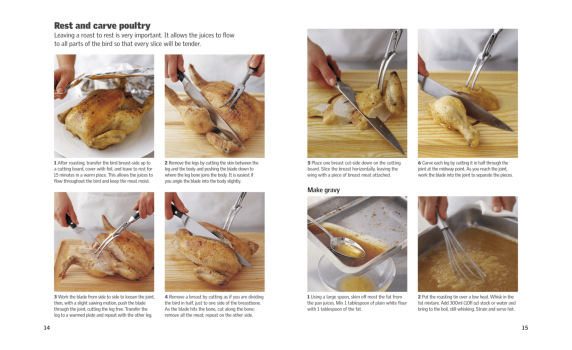

In [ ]:
im = cv2.imread(filepath[0])
fig = plt.figure(figsize=(10, 10))
plt.imshow(im[:,:,::-1])
plt.axis('off')

Extracted images

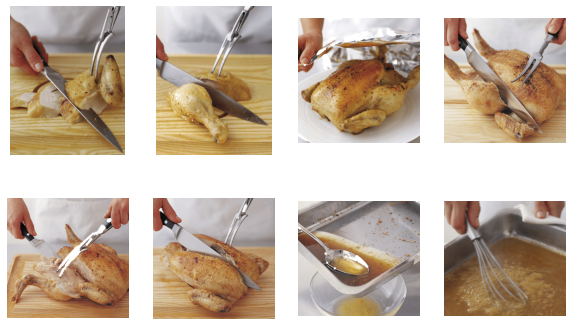

In [ ]:
_, axes = plt.subplots(2, 4, figsize=(10, 6))
for i in range(2):
    for j in range(4):
        axes[i, j].imshow(ex_im[(i*4) + j])
        axes[i, j].axis('off')

Downloading the image to local

In [ ]:
for i, img in enumerate(ex_im):
    path = os.path.join('path/to/image')
    save_and_download_img(path, img, True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
ex_im = extract_images(filepath[1], True)

In [ ]:
len(ex_im)

A page from the book

(-0.5, 3070.5, 1850.5, -0.5)

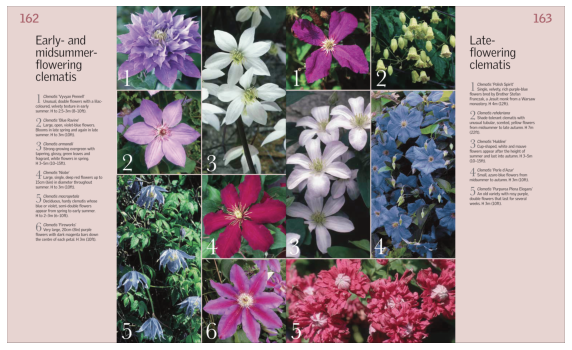

In [ ]:
im = cv2.imread(filepath[7])
fig = plt.figure(figsize=(10, 10))
plt.imshow(im[:,:,::-1])
plt.axis('off')

Extracted images

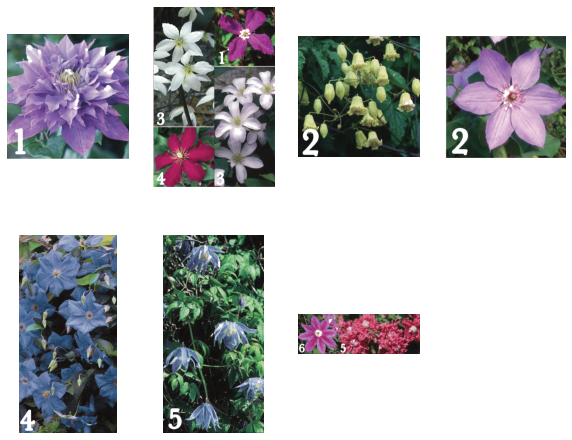

In [ ]:
_, axes = plt.subplots(2, 4, figsize=(10, 8))
for i in range(2):
    for j in range(4):
        axes[i, j].axis('off')
        if (i*4 +j) == 7:
            break
        axes[i, j].imshow(ex_im[(i*4) + j])    

In [ ]:
for i, img in enumerate(ex_im):
    path = os.path.join('path/to/image')
    save_and_download_img(path, img, True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>